# Winter Fashion Trends Analysis 

## Main Motivation

- Understanding current fashion trends helps brands to forecast desired styles, colours, and material, maximise profits and reduce waste and overstock.
- Trend analysis provides a competitive advantage within similar market segments.
- E-commerce platforms can use trend data to improve personalised recommendations to customers.
- Improve the pricing of clothing items 

## Objectives and Hypothesis 

1. **Classify fashion brands into market segments**  
   **Hypothesis 1:** Online research and data comparison will show similar classification patterns.

2. **Identify trending colours, materials, and styles over the last three winter seasons**  
   **Hypothesis 2:** Neutral tones, natural material, and luxury styles will be more prominent in high-end markets; the latter is expected for fast/basic fashion.

3. **Assess whether higher prices correlate with customer satisfaction**  
   **Hypothesis 3:** More expensive items generally have higher customer satisfaction.

4. **Examine whether gender or trend status affects item price**  
   **Hypothesis 4:** Female clothing items and trending/ Emerging items are typically the most expensive.

### Inputs: 
- Winter fashion and trends analysis csv from kaggle: https://www.kaggle.com/datasets/shayanzk/winter-fashion-and-trends?resource=download
### Outputs:
- Figure 1: Heatmap of price of clothing item vs brand
-  Figure 2: Heatmap of price of clothing item vs brand (excluding outliers)
- Figure 3: Boxplot Popular colour against market segment
- Figure 4: Boxplot Popular material against market segment
- Figure 5: Boxplot Popular style against market segment
- Figure 6: Scatter Matrix of Price, customer satisfaction and popularity
- Figure 7: Histogram Kde plot of Price against market segment for each gender type
- Figure 8: Histogram Kde plot of Price against market segment for different trending status


### **1. Load Libraries**

In [ ]:
# Data manipulation
#===============================================================================
import pandas as pd
import numpy as np
# Data visualization
#===============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
#Check if you are working in the correct directory 
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\lacma\\OneDrive\\Desktop\\Fashion_Trends_Analysis\\Fashion_Trends_Analysis'

### **2. Load data and analyse basic data information** 

In [331]:
#Read the csv file and set up a new data frame
df_raw_data=pd.read_csv('Winter_Fashion_Trends_Dataset.csv') #Load data set
df_raw_data.head(10) #Display first 10 lines of data 

,ID,Brand,Category,Color,Material,Style,Gender,Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status
0,1,Adidas,Gloves,Brown,Polyester,Streetwear,Women,Winter 2025,244.06,6.0,4.9,Trending
1,2,Gucci,Gloves,Red,Leather,Sporty,Men,Winter 2023,366.73,8.8,3.3,Trending
2,3,H&M,Coat,Brown,Fleece,Streetwear,Unisex,Winter 2025,741.55,4.8,3.5,Trending
3,4,North Face,Coat,Blue,Cashmere,Formal,Men,Winter 2024,116.09,7.5,3.1,Outdated
4,5,Mango,Thermal,Blue,Cashmere,Formal,Unisex,Winter 2025,193.16,7.8,4.3,Outdated
5,6,Uniqlo,Thermal,Black,Fleece,Formal,Unisex,Winter 2025,699.85,1.7,4.2,Outdated
6,7,Uniqlo,Coat,Gray,Fleece,Casual,Men,Winter 2025,497.79,9.7,3.0,Trending
7,8,Mango,Sweater,Cream,Cotton,Streetwear,Unisex,Winter 2025,579.37,6.6,3.8,Outdated
8,9,Gucci,Gloves,Brown,Cotton,Casual,Unisex,Winter 2024,315.96,6.2,2.8,Outdated
9,10,Mango,Scarf,Maroon,Leather,Luxury,Unisex,Winter 2023,468.58,2.5,4.9,Classic


In [333]:
#Create a summary of information of the raw data in preparation of data cleaning
print(f'The shape of the data frame is{df_raw_data.shape}')
print(f'The data types within the data frame are{df_raw_data.dtypes}')
print(f'The data that is duplicated are {df_raw_data.duplicated().sum()}')
print(f'The data that contain missing values are {df_raw_data.isnull().sum()}')

The shape of the data frame is(150, 12)
The data types within the data frame areID                    int64
Brand                object
Category             object
Color                object
Material             object
Style                object
Gender               object
Season               object
Price(USD)          float64
Popularity_Score    float64
Customer_Rating     float64
Trend_Status         object
dtype: object
The data that is duplicated are 0
The data that contain missing values are ID                  0
Brand               0
Category            0
Color               0
Material            0
Style               0
Gender              0
Season              0
Price(USD)          0
Popularity_Score    0
Customer_Rating     0
Trend_Status        0
dtype: int64


##### Summary of Data Information

- Data shape is small/medium size  
- Discrete data types are objects and continuous data types are floats  
- Conversion of season year to datetime is beneficial for time series analysis or change into integer
- There are no duplicate values  
- There are no missing values in the raw data frame  

 

### **3. Clean and preprocess data**

In [334]:
# Remove unecessary column 'ID'
#===============================================================================
df_clean = df_raw_data.drop('ID', axis = 1) #drop Id and rename data frame 
# Standardise all float columns to be rounded to two decimal places 
#===============================================================================
float_cols = df_clean.select_dtypes(include=['float']).columns 
df_clean[float_cols] = df_clean[float_cols].round(2)#round to 2dp
# Convert Season column into a datetime data type
#===============================================================================
df_clean['Season']=df_clean['Season'].map(lambda a: a.lstrip('Winter ') )#remove Winter from string 
df_clean.rename(columns={'Season': 'Winter Season'}, inplace=True)# rename the column with Winter season 
df_clean['Winter Season']=pd.to_datetime(df_clean['Winter Season'])# Convert the year into datetime data typem
df_clean['Winter Season']=df_clean['Winter Season'].dt.year #Display only the year  
# Confirm data type
#===============================================================================
print(f'The data types within the data frame are{df_clean.dtypes}')#print updated data types
df_clean.head(10) #show first 10 rows 

The data types within the data frame areBrand                object
Category             object
Color                object
Material             object
Style                object
Gender               object
Winter Season         int32
Price(USD)          float64
Popularity_Score    float64
Customer_Rating     float64
Trend_Status         object
dtype: object


,Brand,Category,Color,Material,Style,Gender,Winter Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status
0,Adidas,Gloves,Brown,Polyester,Streetwear,Women,2025,244.06,6.0,4.9,Trending
1,Gucci,Gloves,Red,Leather,Sporty,Men,2023,366.73,8.8,3.3,Trending
2,H&M,Coat,Brown,Fleece,Streetwear,Unisex,2025,741.55,4.8,3.5,Trending
3,North Face,Coat,Blue,Cashmere,Formal,Men,2024,116.09,7.5,3.1,Outdated
4,Mango,Thermal,Blue,Cashmere,Formal,Unisex,2025,193.16,7.8,4.3,Outdated
5,Uniqlo,Thermal,Black,Fleece,Formal,Unisex,2025,699.85,1.7,4.2,Outdated
6,Uniqlo,Coat,Gray,Fleece,Casual,Men,2025,497.79,9.7,3.0,Trending
7,Mango,Sweater,Cream,Cotton,Streetwear,Unisex,2025,579.37,6.6,3.8,Outdated
8,Gucci,Gloves,Brown,Cotton,Casual,Unisex,2024,315.96,6.2,2.8,Outdated
9,Mango,Scarf,Maroon,Leather,Luxury,Unisex,2023,468.58,2.5,4.9,Classic


##### Results of data cleaning:

- ID column has been dropped   
- Numerical values have been standardised to only contain 2 decimal points   
- Conversion of season year to datetime and then integer 
  


### **4. Exploritory Analysis**



#### 4a. H1: Appropriate Classification of Brands 

- **Overview:**  
  This section explores the most appropriate way to classify the brands in the dataset. Clothing brands today are expanding their product ranges to reach wider markets, with many **high-end labels** offering **mid-range** items.  
  This trend highlights the need to **accurately classify products** to distinguish genuine high-end fashion from basic or mid-tier categories.

- **Steps for Classification:**
  1. **Conduct research** — Use online sources or AI tools to classify the **market segment** for each brand.  
  2. **Compare prices** — Classify each brand by comparing the **price levels of different clothing items** against those of other brands.

- **Goal:**  
  To ensure that each brand is correctly categorized as **High-End**, **Mid-Range**, or **Basic Fashion**, based on both market research and quantitative pricing analysis.
 


In [340]:
# 4a. Identify Fashion brands to be classified
#===============================================================================
unique_brands=df_clean['Brand'].unique()
unique_brands

array(['Adidas', 'Gucci', 'H&M', 'North Face', 'Mango', 'Uniqlo', 'Zara',
       'Prada', "Levi's", 'Nike'], dtype=object)

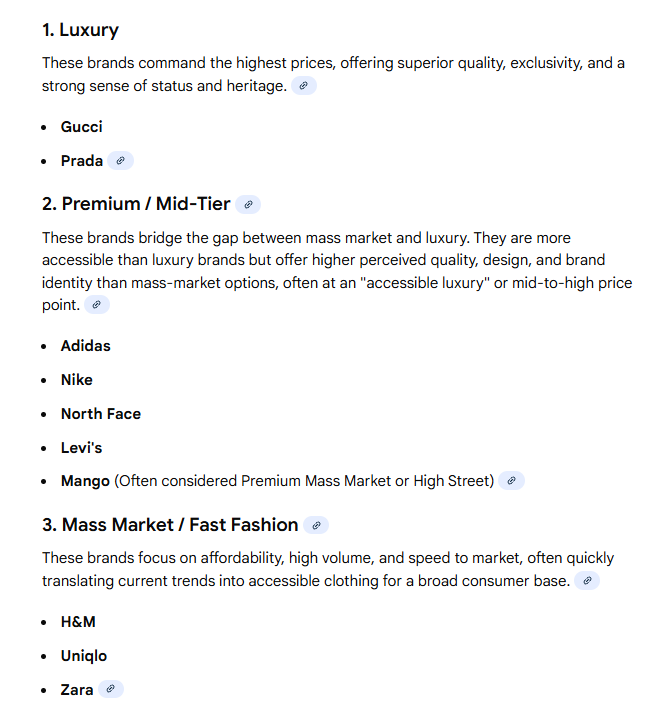

In [341]:
# 4.a.1. Research on Fashion Brands using the internet/ AI tools 
#===============================================================================
from IPython.display import Image, display #Import Library to display image.

# Display a local image file
display(Image(filename='Fashion Brands research.png'))

#The research suggested to split the fashion Brands into 3 groups 'High-End', 'Mid-range' and 'Basic Fashion'

In [ ]:
# 4.a.2. Categorise Fashion brands based on the price of different clothing items 
#===============================================================================
unique_category=df_clean['Category'].unique() #Identify the types of clothing items in the data set 
unique_category

array(['Gloves', 'Coat', 'Thermal', 'Sweater', 'Scarf', 'Beanie',
       'Cardigan', 'Jacket', 'Hoodie', 'Boots'], dtype=object)

In [ ]:
# Create a dataframe of Brand vs Clothing item in order to visualise the price range on a heatmap to aid classification
#===============================================================================
df_heatmap_table = df_clean[['Brand','Category','Price(USD)']]#Subset data to include only columns needed for the heatmap.
df_heatmap_table=df_heatmap_table.groupby(by=['Brand','Category']).mean().round(2) #This groups the data by each brand and category pair 
df_heatmap_table=pd.pivot_table(data=df_heatmap_table,
               index='Brand',
               columns='Category',
               values='Price(USD)').reset_index().rename_axis(mapper=None, axis=1) #Pivot the table to make it approprate for a heatmap visual 
df_heatmap_table.set_index('Brand',inplace=True)#remove standard index column and replace with Brand column 
df_heatmap_table #Print heatmap table 


,Beanie,Boots,Cardigan,Coat,Gloves,Hoodie,Jacket,Scarf,Sweater,Thermal
Brand,,,,,,,,,,
Adidas,NaN,NaN,775.42,NaN,393.32,NaN,771.22,430.58,NaN,626.78
Gucci,548.71,NaN,NaN,134.66,313.03,513.28,NaN,586.29,432.93,530.44
H&M,557.13,NaN,NaN,741.55,276.86,547.76,512.12,512.48,197.04,389.24
Levi's,NaN,690.75,210.74,637.56,NaN,624.26,NaN,146.36,413.65,542.67
Mango,NaN,489.11,597.69,573.52,259.04,481.15,NaN,419.65,526.73,288.13
Nike,433.00,293.87,435.24,NaN,77.51,705.85,NaN,445.08,277.99,NaN
North Face,NaN,433.16,426.39,356.24,281.50,349.96,511.82,380.94,415.05,217.74
Prada,407.11,342.14,79.86,687.44,398.21,NaN,377.36,439.78,674.30,333.11
Uniqlo,629.22,NaN,NaN,622.56,706.80,632.49,404.43,329.53,644.97,603.92


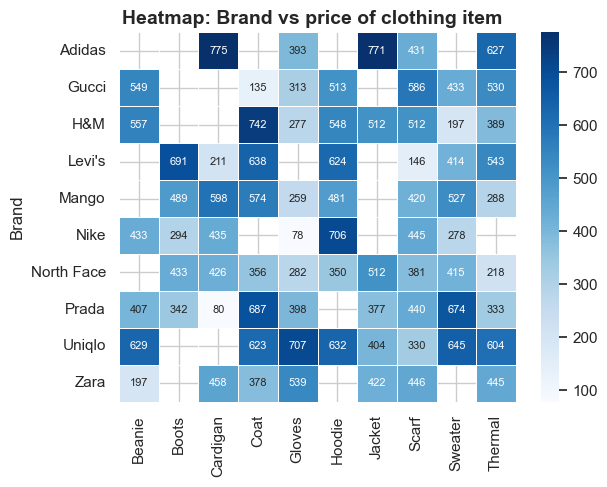

In [376]:
# Create heatmap of the newly formed table to visualise the price for the same clothing items for each brand 
#===============================================================================
heatmap_figure=sns.set_theme(style="whitegrid") #format the grid colour settings 
sns.heatmap(data=df_heatmap_table, annot=True, linewidths=0.5, fmt=".0f",annot_kws={"size": 8},cmap='Blues')# set up the heatmap 
plt.title("Heatmap: Brand vs price of clothing item  ", fontsize=14, fontweight='bold')
plt.show()#show the heatmap figure

In [ ]:
#Measured how frequently each brand was the most expensive. 
#===============================================================================
col_list= df_heatmap_table.columns.tolist()#convert the columns of clothing items into a list
most_expensive_brand = {}  # dictionary to store index of max for each column
for i in col_list:
    most_expensive_brand[i] = df_heatmap_table[i].idxmax()  # gets row index of max
value_counts_brands = pd.Series(list(most_expensive_brand.values())).value_counts() #counts how frequent the each brand was the most expensive
value_counts_brands


Adidas    3
Uniqlo    2
Levi's    1
H&M       1
Nike      1
Gucci     1
Prada     1
Name: count, dtype: int64

#### Review and Analysis of First Heatmap

- **Overall Pattern:**  
  No clear or consistent pattern is observed in the first heatmap.  
- **Lower-End Brands:**  
  In general, **North Face** and **Zara** appear to be positioned at the lower end of the fashion market.  
- **Unexpected Findings:**  
  Some unexpected patterns emerge for **Gucci** and **Prada**, which were expected to occupy the higher end of the market but do not consistently reflect this in the data.  
- **Surprising Results:**  
  **Uniqlo** and **Adidas** show the highest number items priced mostexpensive, which is surprising given their usual positioning in the mid-range market segment.  

---

#### Further Work

- **Next Step:**  
  Review and analyze potential **outliers** in the mean price values displayed on the heatmap to help improve the quality of results. 

In [362]:
#Detecting the outliers based on the IQR method  
#===============================================================================
def detect_outliers_iqr(column, threshold=1.5):
    iqr = column.quantile(0.75) - column.quantile(0.25) #IQR
    lower_bound = column.quantile(0.25) - threshold * iqr
    upper_bound = column.quantile(0.75) + threshold * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

outliers = df_heatmap_table.apply(detect_outliers_iqr)#Apply function to heatmap data frame
df_no_outliers = df_heatmap_table.mask(outliers)#removes all the outliers from the data frame. Data frame is renamed
df_no_outliers

,Beanie,Boots,Cardigan,Coat,Gloves,Hoodie,Jacket,Scarf,Sweater,Thermal
Brand,,,,,,,,,,
Adidas,NaN,NaN,775.42,NaN,393.32,NaN,NaN,430.58,NaN,626.78
Gucci,548.71,NaN,NaN,134.66,313.03,513.28,NaN,NaN,432.93,530.44
H&M,557.13,NaN,NaN,741.55,276.86,547.76,512.12,512.48,197.04,389.24
Levi's,NaN,690.75,210.74,637.56,NaN,624.26,NaN,NaN,413.65,542.67
Mango,NaN,489.11,597.69,573.52,259.04,481.15,NaN,419.65,526.73,288.13
Nike,433.00,293.87,435.24,NaN,NaN,705.85,NaN,445.08,277.99,NaN
North Face,NaN,433.16,426.39,356.24,281.50,349.96,511.82,380.94,415.05,217.74
Prada,407.11,342.14,79.86,687.44,398.21,NaN,377.36,439.78,674.30,333.11
Uniqlo,629.22,NaN,NaN,622.56,NaN,632.49,404.43,329.53,644.97,603.92


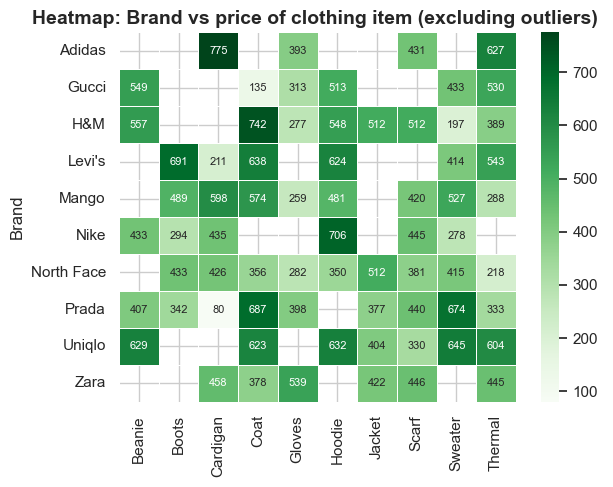

In [377]:
# Create heatmap of the newly formed table to visualise the price for the same clothing items for each brand with otliers removed 
#===============================================================================
heatmap_no_outliers_fig=sns.set_theme(style="whitegrid") #Format the grid
sns.heatmap(data=df_no_outliers, annot=True, linewidths=0.5, fmt=".0f",annot_kws={"size": 8},cmap='Greens') #heatmap 
plt.title("Heatmap: Brand vs price of clothing item (excluding outliers) ", fontsize=14, fontweight='bold')
plt.show() #prints figure

In [ ]:
#Measured how frequently each brand was the most expensive (excluding Outliers). 
#===============================================================================
col_list= df_no_outliers.columns.tolist() #convert the columns of clothing items into a list
most_expensive_brand = {}  # dictionary to store index of max for each column
for i in col_list:
    most_expensive_brand[i] = df_no_outliers[i].idxmax()  # get row index of max
value_counts_brands = pd.Series(list(most_expensive_brand.values())).value_counts() #counts the frequency
value_counts_brands

H&M       3
Adidas    2
Uniqlo    1
Levi's    1
Zara      1
Nike      1
Prada     1
Name: count, dtype: int64

#### Review and Analysis of the second Heatmap

- A few outliers were removed; however, this only made the classification results more surprising.  
- **H&M** now appears as the brand with the most expensive items across various clothing categories.  
- **Zara** now holds one of the most expensive items, while **Gucci** has none — an unexpected outcome.  

---

#### Further Analysis

- Move beyond identifying which brands have the most expensive items.  
- Incorporate the **Interquartile Range (IQR)** to classify brands more accurately based on price distribution.

In [369]:
#Set up the parameters require for IQR 
#===============================================================================
df_medians = df_no_outliers.median(numeric_only=True) #sets up the median for all numerical values 
df_upper_quartile = df_no_outliers.quantile(0.75, numeric_only=True) #sets up the upper quartile for all numerical values 


    

In [ ]:
#Create a function that classifys the price value according to the quartiles
#===============================================================================
def classify_value(value, col):
    if value >= df_upper_quartile[col]:
        return "High-End"
    elif value < df_upper_quartile[col] and value >= df_medians[col]:
        return "Mid-range"
    else:
        return "Basic Fashion"

df_classified = df_no_outliers.copy()#create a new data frame

# Apply classification to each column in the DataFrame
for col in df_no_outliers.columns:
    df_classified[col] = df_classified[col].apply(classify_value, col=col)


classification_counts = df_classified.apply(pd.Series.value_counts, axis=1) # Count the occurrences of each classification for each brand
classification_counts



,Basic Fashion,High-End,Mid-range
Brand,,,
Adidas,7.0,2.0,1.0
Gucci,6.0,NaN,4.0
H&M,5.0,4.0,1.0
Levi's,6.0,2.0,2.0
Mango,7.0,2.0,1.0
Nike,7.0,1.0,2.0
North Face,8.0,1.0,1.0
Prada,6.0,3.0,1.0
Uniqlo,5.0,4.0,1.0


##### Final Classification Review and Analysis

The table below shows how the classification of brands changed at each stage of analysis.

| **Brand**     | **Classification after Internet Research** | **Classification after Data Analysis** | **Final Classification** |
|----------------|---------------------------------------------|----------------------------------------|---------------------------|
| Adidas         | Mid-range                                  | High-End                              | High-End                 |
| Gucci          | High-End                                   | Mid-range                              | High-End                 |
| H&M            | Basic Fashion                              | High-End                              | Mid-range              |
| Levi’s         | Mid-range                                  | Basic Fashion / Mid-range             | Mid-range                |
| Mango          | Mid-range                                  | Basic Fashion                         | Basic Fashion            |
| Nike           | Mid-range                                  | Mid-range                             | Mid-range                |
| North Face     | Mid-range                                  | Basic Fashion                         | Basic Fashion            |
| Prada          | High-End                                   | High-End                              | High-End                 |
| Uniqlo         | Basic Fashion                              | High-End                              | Mid-range               |
| Zara           | Basic Fashion                              | Mid-range                             | Basic Fashion            |

---

##### Notes on Classification

- The **classification from data analysis** is based on interpretation of the **heatmaps** and comparison of each brand’s classification counts across market segments, where appropriate. e.g. Since Uniqlo and H&M had the highest counts in the **High-end** category they were considered High-end for the analysis.
- The **final classification** represents a balanced judgment between the two methods, often selecting the **mid-range** category when the analyses show opposite extremes.  
- When classifications differ, **data driven analysis** is typically favored as it provides evidence based insights.  
- **Exceptions:**  
  - **Gucci** and **Zara** were classified based on **reputation and brand positioning**, where research based insights were deemed more appropriate.

#### 4b. Feature Engineering

In [ ]:
#Create a new feature to input the Market Segment classification explored in 4a
#===============================================================================
def ClassificationMarketSegment(df_clean): #Create an new function to classify the brands into 3 market segments
    df_clean['Market Segment']=df_clean.apply(
        lambda x: "High-End" if x['Brand'] in ["Gucci","Prada","Adidas"] else "Mid-range" if x['Brand'] in ["Nike","Levi's","Uniqlo","H&M"] else 'Basic Fashion',
        axis=1
    )
    return df_clean


df_clean = df_clean.pipe(ClassificationMarketSegment) # Apply function using pipe
df_clean.head(10) #show first 10 rows of data frame

,Brand,Category,Color,Material,Style,Gender,Winter Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status,Market Segment
0,Adidas,Gloves,Brown,Polyester,Streetwear,Women,2025,244.06,6.0,4.9,Trending,High-End
1,Gucci,Gloves,Red,Leather,Sporty,Men,2023,366.73,8.8,3.3,Trending,High-End
2,H&M,Coat,Brown,Fleece,Streetwear,Unisex,2025,741.55,4.8,3.5,Trending,Mid-range
3,North Face,Coat,Blue,Cashmere,Formal,Men,2024,116.09,7.5,3.1,Outdated,Basic Fashion
4,Mango,Thermal,Blue,Cashmere,Formal,Unisex,2025,193.16,7.8,4.3,Outdated,Basic Fashion
5,Uniqlo,Thermal,Black,Fleece,Formal,Unisex,2025,699.85,1.7,4.2,Outdated,Mid-range
6,Uniqlo,Coat,Gray,Fleece,Casual,Men,2025,497.79,9.7,3.0,Trending,Mid-range
7,Mango,Sweater,Cream,Cotton,Streetwear,Unisex,2025,579.37,6.6,3.8,Outdated,Basic Fashion
8,Gucci,Gloves,Brown,Cotton,Casual,Unisex,2024,315.96,6.2,2.8,Outdated,High-End
9,Mango,Scarf,Maroon,Leather,Luxury,Unisex,2023,468.58,2.5,4.9,Classic,Basic Fashion


#### 4c. Examine corelation variables

##### H2: Current trends

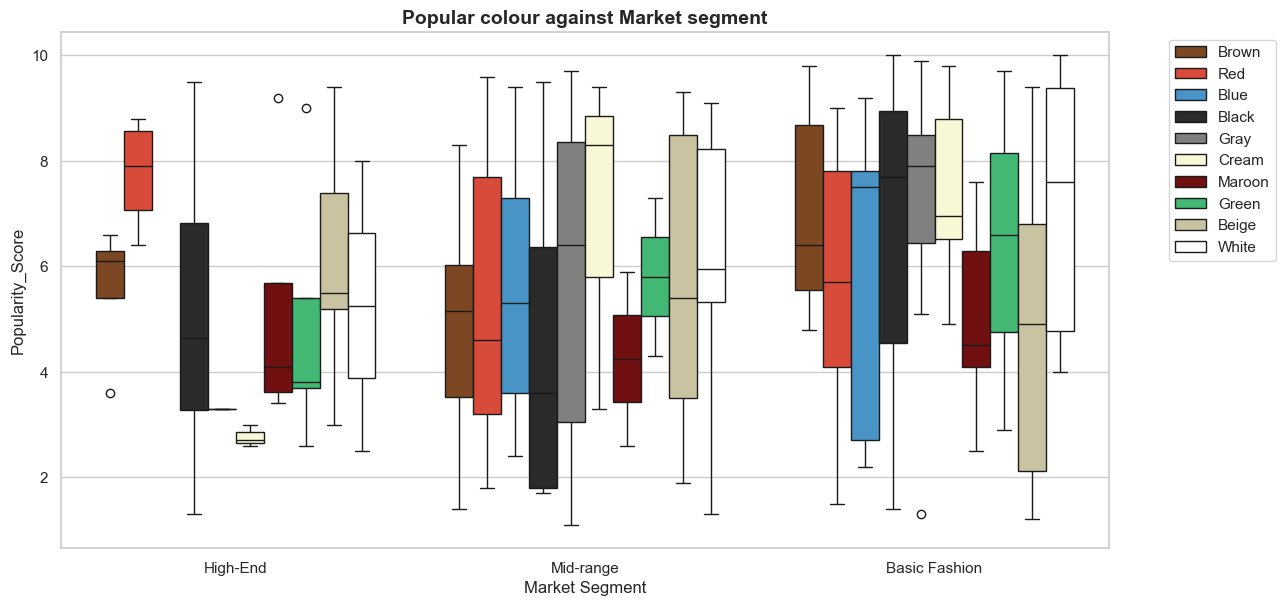

In [ ]:
#Plot boxplot to explore the most popular colours in each market segment
#===============================================================================
palette_dict = {
    "Brown": "#8B4513",
    "Red": "#f23621",
    "Blue": "#3498db",
    "Black": "#2B2A2A",
    "Gray": "#808080",
    "Cream": "#FFFDD0",
    "Maroon": "#800000",
    "Green": "#2ecc71",
    "Beige": "#D0C79B",
    "White": "#FFFFFF"
}
plt.figure(figsize=(13, 6))#resize figure to fit legend
box_plot_colours= sns.boxplot(data=df_clean, x="Market Segment", y="Popularity_Score", hue="Color",palette=palette_dict, order=["High-End", "Mid-range", "Basic Fashion"])#plot box plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')#re-arrange position of box plot legend 
plt.tight_layout() 
plt.title("Popular colour against Market segment", fontsize=14, fontweight='bold')#plot tite
plt.show() #show figure

##### Analysis of popular colour against market segment

This boxplot shows the **distribution of popularity scores** for different clothing colours across three **market segments**: High-End, Mid-range, and Basic Fashion.

- High-End Segment:
    - **Red** and **Brown** show the **highest median popularity**, suggesting they are most favored in luxury fashion.  
    - **Black** has a **wide popularity range**, indicating both highly popular and less popular uses across high-end items.  
    - **Cream** is less popular, showing a narrow range and lower scores overall.

- Mid-Range Segment:
    - Shows the widest range of colour preferences, with no clear colour dominating.  
    - **Blue**, **Gray**, and **Beige** colors show **moderately high median popularity**, reflecting their mainstream appeal.  
    - **Maroon** and **Green** show lower median popularity and greater variability.  
    - The larger spread (IQR) suggests diverse customer preferences in this market level.

- Basic Fashion Segment:
    - **Brown**, **Blue**, **Gray**, and **White** show higher popularity scores, suggesting strong choices for mass-market appeal.  
    - **Red** and **Maroon** appear less popular, with lower medians and wider variability.  
    - **Cream** and **Beige** maintain moderate, steady popularity.  
    - Overall, this segment displays **wide variability**, suggesting diverse consumer tastes.


The analysis indicates that **colour choices show some alignment with the market segment**:
- **High-End brands** tend to use **bolder, more expressive colours** which may signal exclusivity.  
- **Mid-Range brands** favor **neutral tones** that balance style and accessibility. Neutral tones are typically favored more in western brands and were likely selected to appeal to a slightly higher demograph.  
- **Basic Fashion brands** rely on **neutral and practical colours** to attract a wider audience.

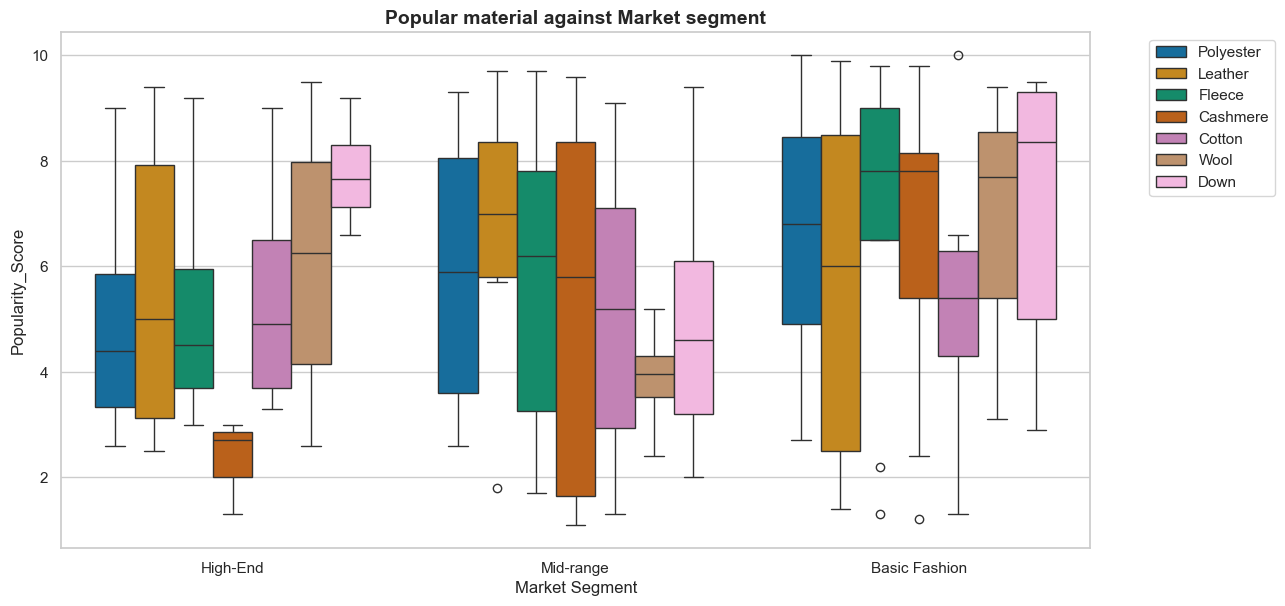

In [378]:
#Plot boxplot to explore the most popular material in each market segment
#===============================================================================
plt.figure(figsize=(13, 6))#increase figure size
box_plot_materials=sns.boxplot(data=df_clean, x="Market Segment", y="Popularity_Score", hue="Material",palette='colorblind', order=["High-End", "Mid-range", "Basic Fashion"])#plot box plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')# re-arrange legend
plt.tight_layout()
plt.title("Popular material against Market segment", fontsize=14, fontweight='bold')#plot title
plt.show()#show figure


##### Analysis of popular material against market segment
Each box represents the **spread and median popularity** of materials within a particular segment, highlighting how consumer preferences vary across market tiers.
- High-End Segment:
    - **Down** has the **highest median popularity**, suggesting its strong with luxury and high-quality fashion.    
    - **Cashmere**, despite being a traditionally premium material, shows a **lower and narrower popularity range**, possibly due to niche or seasonal use.  
    - **Polyester** and **Fleece** are less popular in this segment, likely reflecting the preference for natural, high-end materials.

- Mid-range segment:
    - **Polyester**, **Leather**, and **Fleece** dominate in the mid-range market segment.  
    - **Wool** and **Down** show a more balanced, yet, small distribution, suggesting consistent popularity but with fewer popular items.   
    - This segment shows the widest variety in material usage, indicating consumer openness to both synthetic and natural materials.

- Basic Fashion Segment:
    - **Polyester** and **Fleece** show **high popularity**, suggesting affordability and versatility materials for Basic fashion.    
    - **Down** and **Wool** retain high medians but appear less frequently, likely due to higher production costs.  

The analysis shows some alignment with market strategy and choice of material 
- **High-end brands** prioritize **quality and craftsmanship**, using premium materials.  
- **Mid-range brands** focus on **durability and versatility** with blended materials.  
- **Basic fashion brands** emphasise **affordability and functionality**, favoring synthetics like polyester and fleece.

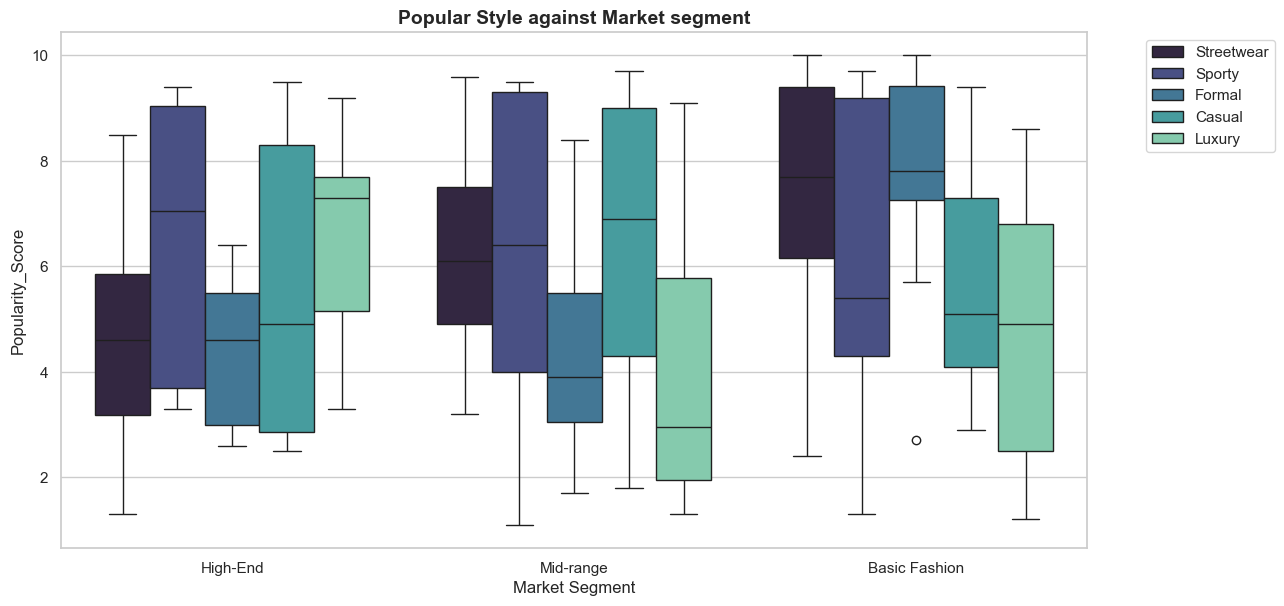

In [379]:
#Plot boxplot to explore the most popular style in each market segment
#===============================================================================
plt.figure(figsize=(13, 6))#figure size
box_plot_style=sns.boxplot(data=df_clean, x="Market Segment", y="Popularity_Score", hue="Style",palette='mako', order=["High-End", "Mid-range", "Basic Fashion"])#plot box plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')#relocate legend
plt.tight_layout()
plt.title("Popular Style against Market segment", fontsize=14, fontweight='bold')#plot title
plt.show()# show figure


##### Analysis of popular style against market segment
Each box represents the **spread and median popularity** of style within a particular segment, highlighting how consumer preferences vary across market tiers.
- High-End Segment:
    - **Luxury** and **Casual** styles are the most popular showing high median scores and relatively narrow ranges indicating consistent consumer preference.  
    - **Sporty** is also very popular, suggesting the influence of *athleisure* even in premium brands.  
    - **Streetwear** and **Formal** styles have **lower medians** and wider variability, reflecting more niche or fluctuating demand.


- Mid-range segment:
    - **Sporty** and **Casual** are very popular this segment, suggesting a broad appeal.  
    - **Luxury** styles show a drop in median popularity, suggesting that mid-tier consumers are less drawn to luxury focused aesthetics.  
    - **Streetwear** remains moderately popular with a wider range, aligning with young consumers and the mass market.  
    - **Formal** styles appear less popular overall, perhaps due the types of brands that were selected during the classification stage. i.e Nike is unlikely to have formal wear.


- Basic Fashion Segment:
    - **Streetwear**, **Sporty**, and **Formal** styles are popular, suggesting strong consumer demand for practical and accessible styles.  
    - **Luxury** styles rank are not popular in this group, with a wide range and lower medians, as expected for budget friendly markets.  

The analysis shows some alignment with market strategy and choice of style 
- **High-end brands** are versatile as they show **luxury and relaxed** styles.
- **Mid-range brands** focus on **functionality** more due to the peak in sporty and casual wear
- **Basic fashion brands** emphasise **functionality** as well, but looks to appeal to a wider market from high scores in streetwear to formal wear.

##### H3: Correlations between price, customer statisfaction and popularity

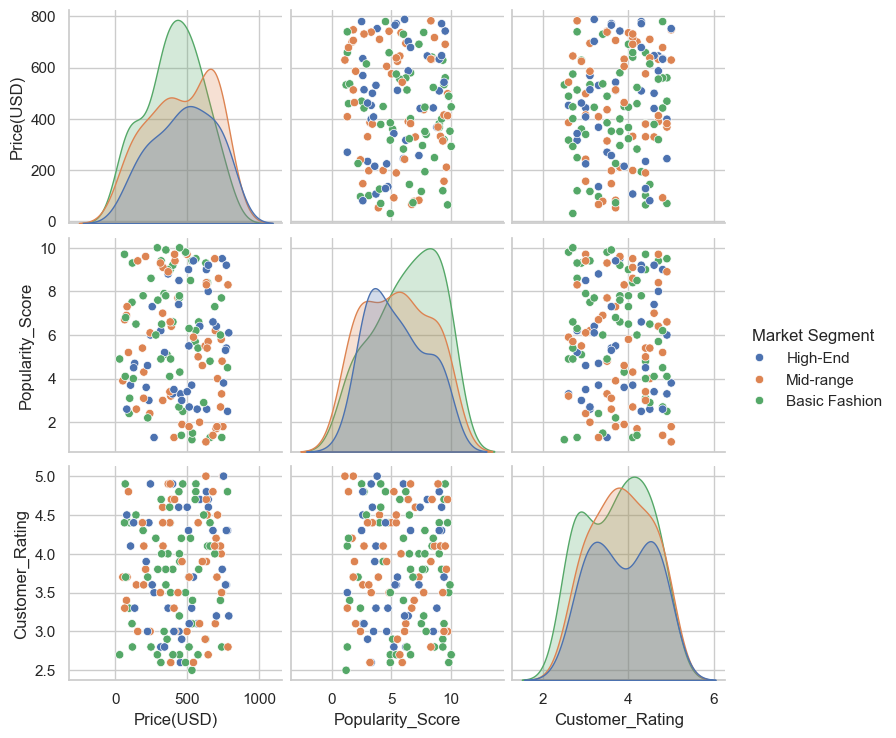

In [ ]:
#Plot Scatter plots and Histograms to explore the correlation between Price, Popularity and Customer rating 
#==========================================================================================================
compare_correlation_pairplot=sns.pairplot(
    df_clean,
    x_vars=["Price(USD)", "Popularity_Score", "Customer_Rating"], #X axis
    y_vars=["Price(USD)", "Popularity_Score", "Customer_Rating"], #Y axis
    hue="Market Segment"
)
plt.show() #Show figure 

In [ ]:
#Data frame to explore the correlation between Price, Popularity and Customer rating and ease understanding of scatter plots
#=====================================================================================================================================
df_correlations= df_clean[["Price(USD)", "Popularity_Score", "Customer_Rating"]].corr() #data frame to show correlation between various variables 


##### Review and analysis of the Correlation plots:
There are no significant correlations among the variables. Echoed in the data frame above which suggests very weak correlation with no corelations values even above 0.5. Therefore, nothing else was explored further in this analysis. 

This may have been due expectations of product increasing with price therefore customer could have just rated it average. High price does not always mean high quality, a lot of it is due to branding, marketing or production choices. Overall, customers in different markets have expectations and tolerances for price.

##### H4: Impact on price according to gender and trend status

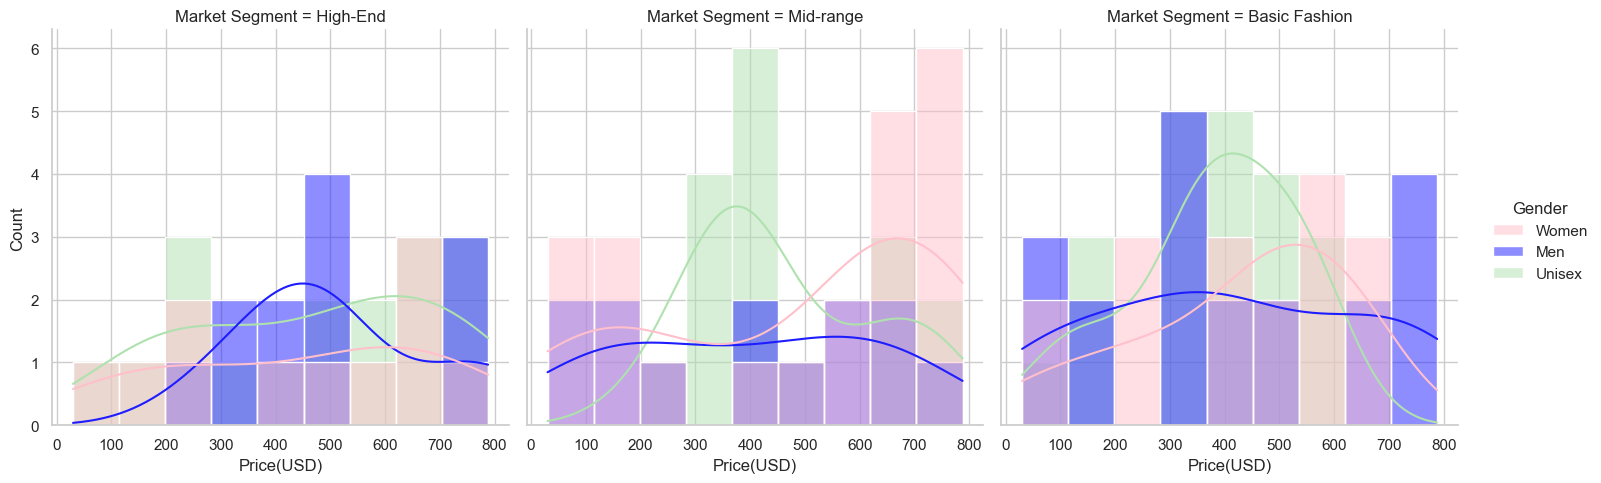

In [ ]:
#Histogram and kde graphs to explore the relationship between the price and gender for each market segment
#==========================================================================================================
palette_dict_gender={"Women":"#FFC0CB",
                     "Men":"#1D1DFF",
                     "Unisex":"#AFE1AF"}# pallet colours for graph
gender_vs_price_graph=sns.displot(data=df_clean, kde=True, x='Price(USD)', hue='Gender', col='Market Segment',palette=palette_dict_gender) #plot histogram and kde
plt.show() #show figure

##### Analysis of prices for different genders across different market segments
The figure shows three side-by-side histograms and KDE plots comparing Price (USD) across the different market segments for different genders  
- High-End Segment:
    - The price range in general is quite broad, around **$200 to $800**. This may because of the various kinds of clothing items analysed.
    - **Men's** items show a more consistent distribution with many items ranging from $400-$600.
    - **Women's** items seem to be spread out and **Unisex** items peak around **$500-$700.**
    - In general, the male and unisex items show a mid to high price range but with medium variation. 


- Mid-range segment:
    - The Price range in general is between **$200-$700.** (only marginally different from the high-end brands)
    - The **Women's** items more of peak around **$600-$700** which is larger than expected for this market segment.
    - **Unisex** peaks at around **$300-$500** which is less than the high-end segment. (as expected), while **Men's** items price range is spread out.


- Basic Fashion Segment:
    - The price range is wide **$100-$800.** 
    - **Unisex** and **Women's** items show peak at **$300-$400** and **$200-$600** respectively.

The analysis shows does not show reliable alignment with price and market segmets.
- Price overlaps across all segments, especially between mid-range and basic fashion. This may be because brands may need to be re-classified to be more accurate or the analysis needs to consider a smaller amount of clothing items categories.
- Unisex items appear to be the most consistent price range across all 3 segments peaking between $300-$400.


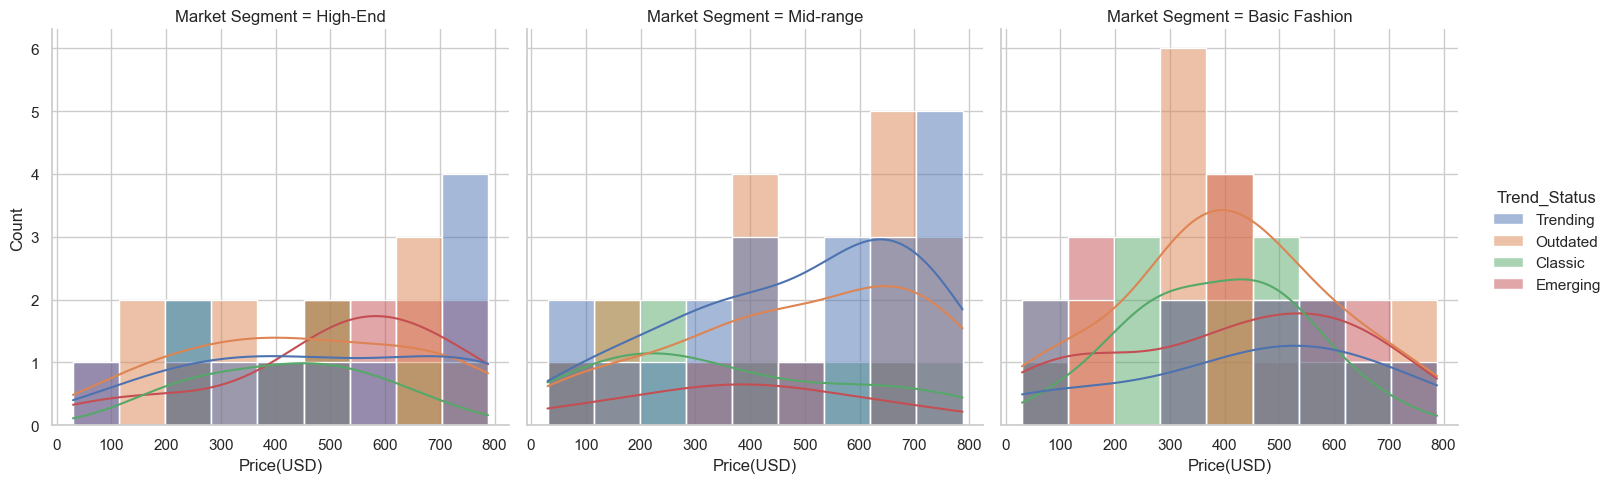

In [ ]:
#Histogram and kde graphs to explore the relationship between the price and trend status for each market segment
#======================================================================================================================
trend_status_vs_price_graph=sns.displot(data=df_clean, kde=True, x='Price(USD)', hue='Trend_Status', col='Market Segment')
plt.show()

##### Analysis of prices for different trend status across different market segments
The figure shows three side-by-side histograms and KDE plots comparing Price (USD) across the different market segments for different trend status  
- High-End Segment:
    - The price range for **trending items and emerging** peak at around **$400-$600 and $500-$600** respectively. This suggests new-high end releases are priced at the higher end as expected.
    - In contrast,  **outdated and classic** items show a broad range across mid range pricing. 


- Mid-range segment:
    - **Trending and Outdated** items show similar peaks at around **$400-$550 and $500-$600** respectively. This is unusually high for mid-range category, escpecially by comparison to the high-end segment.
    - Unexpectedly, **Classic and Emerging** items have a broad range with small peaks closer to the low and mid price range. 
    - Trending mid-range products are showing an upward price shift which is expected.


- Basic Fashion Segment:
    - **Trending and Emerging items** show small peaks at a higher pricing range of around **$400-$550** similar to the previous two segments.
    - **Outdated and Classic** items show higher peaks near **$300-$400.** 
    - Evem in basic fashion the price range seems to indicate overlap with mid and high end items.

The analysis shows does not show reliable alignment with price and market segmets, but there is some coonsistency in trend status and price.
- There is alot of price overlap between the three market segments.
- In general, Trending and Emerging products hold space in the upper range of the price. While outdated are more mid-range prices, with the exeception of mid-range market segment. Classic seems to have the most stable distribution out of all the trend status.
- Neither market segment or trend status is a reliable predictor of price. Prices overlap significantly. As before the analysis may need to consider rec-classification of the brands or use few clothing item categories to compare.

### **5. Conclusion and Future works**

##### Based on the analysis, the following conclusions have been made:
- The classification system was based on online research/ AI tool and data analysis of the price range of brands. The results showed some inconsistency, therefore, a fair judgement was made between the discrepancies mostly favoring data analysis. **H1: Not true**
- High-End brands favored bolder colors, natural materials and luxury style to show case exclusivity, Mid-range brands chose more neutral tones with blended material focusing on sporty clothes. Basic fashion brand used most colours, synthetiic materials and a wide range of styles to appeal to more of the market. **H2: Mostly true showing some variation in colour** 
- There was no or very weak correlation between Price, Customer rating and popularity score of the data. **H3: Not true**
- Generally, gender did not impact the price of an item. Trend status had minimal influence with trending and emerging prices at a higher price range. Additionally, price did not imapct market segment either. **H4: Mostly not true, trending items shown to be more expensive**

##### Suggested future work:
- Re-classify the brand market segments using more detailed data, but perhaps comparing the price of the same clothing item. Alternatively, look at material quality prestige index.
- Use the data to predict fashion trends based on colour, material and style. 